# Pnemonia Capstone

In [0]:
# Install Kaggle API for download competition data
#!pip3 install -q kaggle

In [0]:
#!pip uninstall -y kaggle
#!pip install --upgrade pip
#!pip install kaggle==1.5.6
#!kaggle -v

In [0]:
#from google.colab import files

#uploaded = files.upload()

#for fn in uploaded.keys():
 # print('User uploaded file "{name}" with length {length} bytes'.format(
 #     name=fn, length=len(uploaded[fn])))
  
# Then move kaggle.json into the folder where the API expects to find it.
#!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

In [0]:
#!kaggle competitions download -c rsna-pneumonia-detection-challenge
#!kaggle competitions download -c rsna-pneumonia-detection-challenge -p /content/drive/My\ Drive/Colab\ Notebooks/RSNAContent

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#!ls /content/drive/My\ Drive/Colab\ Notebooks/RSNAContent

In [0]:
#!kaggle competitions download -c rsna-pneumonia-detection-challenge -p /content/drive/My\ Drive/Colab\ Notebooks/RSNAContent

In [9]:
cd /content/drive/My\ Drive/Colab\ Notebooks/RSNAContent

/content/drive/My Drive/Colab Notebooks/RSNAContent


In [10]:
!ls

'GCP Credits Request Link - RSNA.txt'	 'stage_2_train_labels (1).csv'
 rsna-pneumonia-detection-challenge.zip   stage_2_train_labels.csv
 stage_2_detailed_class_info.csv	  submission1.csv
 stage_2_sample_submission.csv		 'submission (1).gsheet'
 stage_2_test_images			  submission.gsheet
 stage_2_train_images			  submission_iteration2.csv


In [0]:
#!unzip -q rsna-pneumonia-detection-challenge.zip

In [12]:
# install dependencies not included by Colab
# use pip3 to ensure compatibility w/ Google Deep Learning Images 
!pip3 install -q pydicom 
!pip3 install -q tqdm 
!pip3 install -q imgaug 

     |████████████████████████████████| 35.3MB 119kB/s 


Problem Statement
    Objective 
EDA Exploratory data analysis
    - points - 
    
Model : 
    UNET
1. Classification Problem
2. Detection Problem
    

In [13]:
import glob, pylab, pandas as pd
import pydicom, numpy as np
import gc
import matplotlib.pyplot as plt
import seaborn as sns
import os
import tensorflow as tf

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
import numpy as np

from matplotlib.patches import Rectangle
import pydicom as dcm
from matplotlib.patches import Rectangle
import os
import csv


from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.backend import log, epsilon

In [0]:
import glob, pylab, pandas as pd
import pydicom, numpy as np
import gc
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [0]:
project_path = "/content/gdrive/My Drive/Colab Notebooks/RSNAContent/"

In [17]:
print(project_path)

/content/gdrive/My Drive/Colab Notebooks/RSNAContent/


In [18]:
df_train_labels = pd.read_csv("stage_2_train_labels.csv")
df_class_info = pd.read_csv('stage_2_detailed_class_info.csv')
print(df_train_labels.iloc[2])
print("----------------------------------------------")
print(df_class_info.iloc[2])

patientId    00322d4d-1c29-4943-afc9-b6754be640eb
x                                             NaN
y                                             NaN
width                                         NaN
height                                        NaN
Target                                          0
Name: 2, dtype: object
----------------------------------------------
patientId    00322d4d-1c29-4943-afc9-b6754be640eb
class                No Lung Opacity / Not Normal
Name: 2, dtype: object


In [19]:
print(df_train_labels.iloc[4])
print("----------------------------------------------")
print(df_class_info.iloc[4])

patientId    00436515-870c-4b36-a041-de91049b9ab4
x                                             264
y                                             152
width                                         213
height                                        379
Target                                          1
Name: 4, dtype: object
----------------------------------------------
patientId    00436515-870c-4b36-a041-de91049b9ab4
class                                Lung Opacity
Name: 4, dtype: object


In [23]:
patientId = df_train_labels['patientId'][2]
dcm_file = 'stage_2_train_images/%s.dcm' % patientId
dcm_data = pydicom.read_file(dcm_file)

print(dcm_data)

(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0016) SOP Class UID                       UI: Secondary Capture Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.2.276.0.7230010.3.1.4.8323329.11252.1517874357.450548
(0008, 0020) Study Date                          DA: '19010101'
(0008, 0030) Study Time                          TM: '000000.00'
(0008, 0050) Accession Number                    SH: ''
(0008, 0060) Modality                            CS: 'CR'
(0008, 0064) Conversion Type                     CS: 'WSD'
(0008, 0090) Referring Physician's Name          PN: ''
(0008, 103e) Series Description                  LO: 'view: AP'
(0010, 0010) Patient's Name                      PN: '00322d4d-1c29-4943-afc9-b6754be640eb'
(0010, 0020) Patient ID                          LO: '00322d4d-1c29-4943-afc9-b6754be640eb'
(0010, 0030) Patient's Birth Date                DA: ''
(0010, 0040) Patient's Sex                       CS: 'M'
(0010, 1010) Patient'

<class 'numpy.ndarray'>
uint8
(1024, 1024)


(-0.5, 1023.5, 1023.5, -0.5)

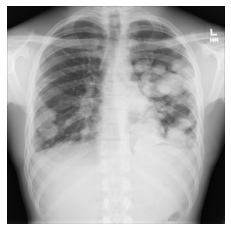

In [24]:
im = dcm_data.pixel_array
print(type(im))
print(im.dtype)
print(im.shape)
pylab.imshow(im, cmap=pylab.cm.gist_gray)
pylab.axis('off')

In [25]:
df_merge = pd.merge(left = df_class_info, right = df_train_labels, how = 'left', on = 'patientId')
gc.collect()

2071

In [26]:
df_merge.head()

,patientId,class,x,y,width,height,Target
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,No Lung Opacity / Not Normal,NaN,NaN,NaN,NaN,0
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,No Lung Opacity / Not Normal,NaN,NaN,NaN,NaN,0
2,00322d4d-1c29-4943-afc9-b6754be640eb,No Lung Opacity / Not Normal,NaN,NaN,NaN,NaN,0
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,Normal,NaN,NaN,NaN,NaN,0
4,00436515-870c-4b36-a041-de91049b9ab4,Lung Opacity,264.0,152.0,213.0,379.0,1


In [27]:
df_merge.shape

(37629, 7)

In [28]:
df_merge.drop_duplicates()

,patientId,class,x,y,width,height,Target
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,No Lung Opacity / Not Normal,NaN,NaN,NaN,NaN,0
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,No Lung Opacity / Not Normal,NaN,NaN,NaN,NaN,0
2,00322d4d-1c29-4943-afc9-b6754be640eb,No Lung Opacity / Not Normal,NaN,NaN,NaN,NaN,0
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,Normal,NaN,NaN,NaN,NaN,0
4,00436515-870c-4b36-a041-de91049b9ab4,Lung Opacity,264.0,152.0,213.0,379.0,1
...,...,...,...,...,...,...,...
37620,c1ec14ff-f6d7-4b38-b0cb-fe07041cbdc8,Lung Opacity,185.0,298.0,228.0,379.0,1
37623,c1edf42b-5958-47ff-a1e7-4f23d99583ba,Normal,NaN,NaN,NaN,NaN,0
37624,c1f6b555-2eb1-4231-98f6-50a963976431,Normal,NaN,NaN,NaN,NaN,0
37625,c1f7889a-9ea9-4acb-b64c-b737c929599a,Lung Opacity,570.0,393.0,261.0,345.0,1


In [0]:
dfg=df_merge['patientId'].value_counts()

In [30]:
dfg.sample(10)

8697ce4a-d16c-44f4-9271-393000aa9d42    1
1af01c2b-ade7-4482-a406-4e1c24335f1a    1
ed321d27-7a28-4371-ad3f-17d9c5c3ad49    1
f2b4e7b9-b338-41e3-860c-fc0b5c2d077e    1
920dacc9-e9ed-4c3d-8afe-e1518d538973    1
e2bac125-a7f4-4d1f-9e52-55559e85ab9c    1
48e50289-c648-476d-9bcc-da7d51270702    1
66d0c0c2-6e75-4481-b1aa-1160c602fe68    1
4034886a-b60a-4aa7-9b75-0abc1989baa3    1
eec6cfaa-b9a6-4baa-8179-6e604272963b    1
Name: patientId, dtype: int64

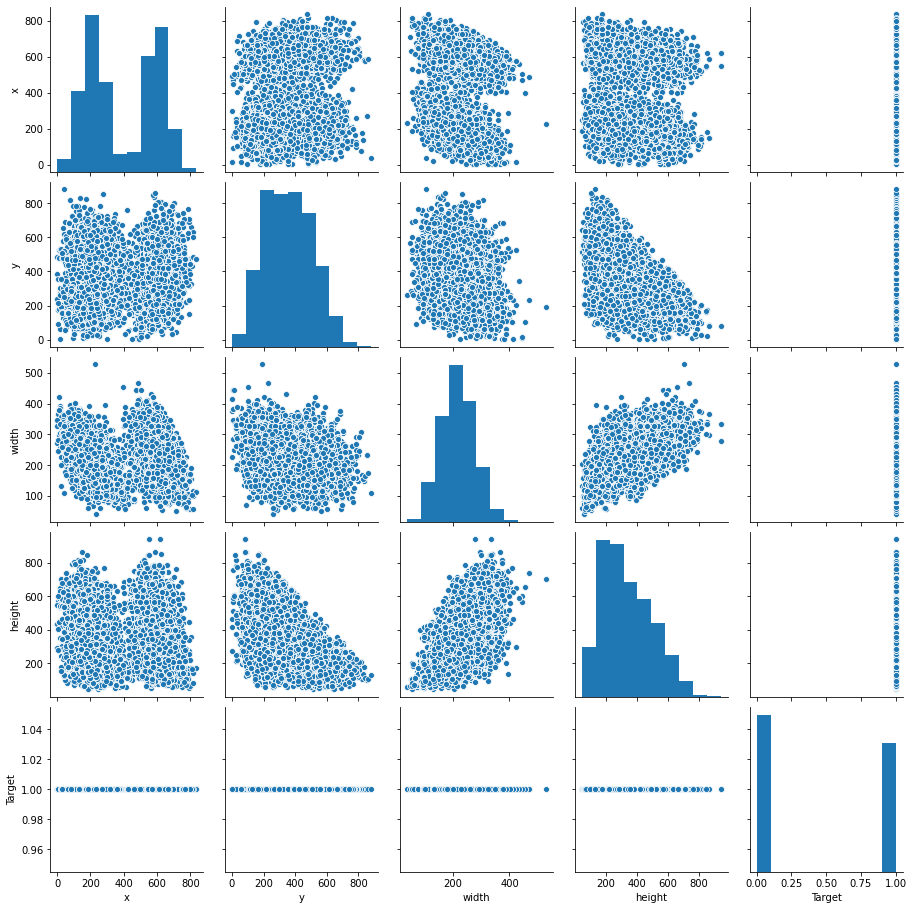

In [31]:
sns.pairplot(df_merge);

In [32]:
df_merge.dtypes

patientId     object
class         object
x            float64
y            float64
width        float64
height       float64
Target         int64
dtype: object

In [33]:
summary = {}
for n, row in df_merge.iterrows():
    if row['class'] not in summary:
        summary[row['class']] = 0
    summary[row['class']] += 1
    
print(summary)

{'No Lung Opacity / Not Normal': 11821, 'Normal': 8851, 'Lung Opacity': 16957}


bar charts

In [34]:
df_merge[df_merge['patientId']=='31764d54-ea3b-434f-bae2-8c579ed13799']

,patientId,class,x,y,width,height,Target
3199,31764d54-ea3b-434f-bae2-8c579ed13799,Lung Opacity,258.0,521.0,266.0,229.0,1
3200,31764d54-ea3b-434f-bae2-8c579ed13799,Lung Opacity,293.0,311.0,166.0,167.0,1
3201,31764d54-ea3b-434f-bae2-8c579ed13799,Lung Opacity,713.0,593.0,181.0,130.0,1
3202,31764d54-ea3b-434f-bae2-8c579ed13799,Lung Opacity,649.0,319.0,190.0,172.0,1
3203,31764d54-ea3b-434f-bae2-8c579ed13799,Lung Opacity,258.0,521.0,266.0,229.0,1
3204,31764d54-ea3b-434f-bae2-8c579ed13799,Lung Opacity,293.0,311.0,166.0,167.0,1
3205,31764d54-ea3b-434f-bae2-8c579ed13799,Lung Opacity,713.0,593.0,181.0,130.0,1
3206,31764d54-ea3b-434f-bae2-8c579ed13799,Lung Opacity,649.0,319.0,190.0,172.0,1
3207,31764d54-ea3b-434f-bae2-8c579ed13799,Lung Opacity,258.0,521.0,266.0,229.0,1
3208,31764d54-ea3b-434f-bae2-8c579ed13799,Lung Opacity,293.0,311.0,166.0,167.0,1


In [35]:
print(df_merge.shape)

(37629, 7)


In [0]:
def parse_data(df,path):
    
    # --- Define lambda to extract coords in list [y, x, height, width] patientId	class	x	y	width	height	Target
    extract_box = lambda row: [row['y'], row['x'], row['height'], row['width']]

    parsed = {}
    for n, row in df.iterrows():
        # --- Initialize patient entry into parsed 
        i=1
        pid=row['patientId']
        pid1=0
        if pid1 != row['patientId'] :
            i=1
        else:
            i=i+1
        pid = row['patientId']
        if pid not in parsed:
            j=i
            parsed[pid] = {
                'count': i,
                'dicom': path+'%s.dcm' % pid,
                'class': row['class'],
                'label': row['Target'],
                'boxes': []}
        else :
             parsed[pid] = {
                'count': i,
                'dicom': path+'%s.dcm' % pid,
                'class': row['class'],
                'label': row['Target'],
                'boxes': []}
            
        # --- Add box if opacity is present
        if parsed[pid]['label'] == 1:
            parsed[pid]['boxes'].append(extract_box(row))
        pid1=pid
    return parsed

In [0]:
parsed_train_df=parse_data(df_merge,"stage_2_train_images/")
parsed_test_df=parse_data(df_merge,"stage_2_test_images/")

In [0]:
def print_Num_data(df):
    i=0;
    j=0;
    for key,value in df.items():
        par_dic=df[key]
        j=j+1
  #  print(par_dic)
        for key,value in par_dic.items():
            if key=="dicom" :
                i=i+1
                if par_dic[key]==0 :
                    print(n["patientId"])
    print(i,j)

In [39]:
print_Num_data(parsed_train_df)
print_Num_data(parsed_test_df)

26684 26684
26684 26684


In [40]:

parsed_train_df['00f08de1-517e-4652-a04f-d1dc9ee48593']

{'boxes': [[275.0, 571.0, 476.0, 230.0]],
 'class': 'Lung Opacity',
 'count': 1,
 'dicom': 'stage_2_train_images/00f08de1-517e-4652-a04f-d1dc9ee48593.dcm',
 'label': 1}

In [41]:
print(parsed_train_df['31764d54-ea3b-434f-bae2-8c579ed13799'])

{'count': 1, 'dicom': 'stage_2_train_images/31764d54-ea3b-434f-bae2-8c579ed13799.dcm', 'class': 'Lung Opacity', 'label': 1, 'boxes': [[319.0, 649.0, 172.0, 190.0]]}


<Figure size 432x288 with 0 Axes>

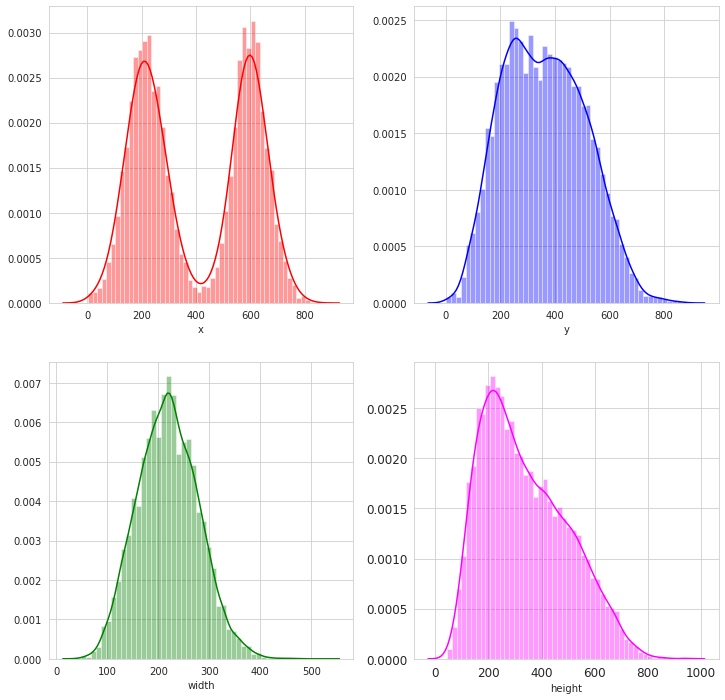

In [42]:
target1 = df_merge[df_merge['Target']==1]
sns.set_style('whitegrid')
plt.figure()
fig, ax = plt.subplots(2,2,figsize=(12,12))
sns.distplot(target1['x'],kde=True,bins=50, color="red", ax=ax[0,0])
sns.distplot(target1['y'],kde=True,bins=50, color="blue", ax=ax[0,1])
sns.distplot(target1['width'],kde=True,bins=50, color="green", ax=ax[1,0])
sns.distplot(target1['height'],kde=True,bins=50, color="magenta", ax=ax[1,1])
locs, labels = plt.xticks()
plt.tick_params(axis='both', which='major', labelsize=12)
plt.show()

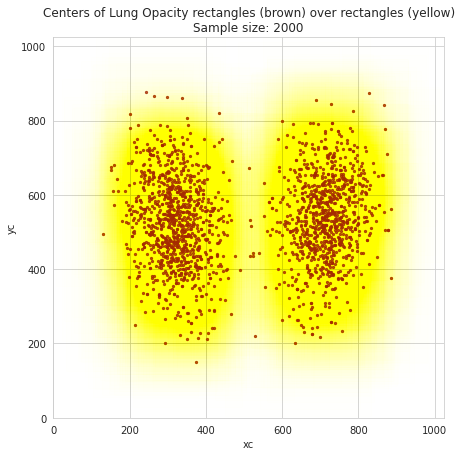

In [43]:
from matplotlib.patches import Rectangle
fig, ax = plt.subplots(1,1,figsize=(7,7))
target_sample = target1.sample(2000)
target_sample['xc'] = target_sample['x'] + target_sample['width'] / 2
target_sample['yc'] = target_sample['y'] + target_sample['height'] / 2
plt.title("Centers of Lung Opacity rectangles (brown) over rectangles (yellow)\nSample size: 2000")
target_sample.plot.scatter(x='xc', y='yc', xlim=(0,1024), ylim=(0,1024), ax=ax, alpha=0.8, marker=".", color="brown")
for i, crt_sample in target_sample.iterrows():
    ax.add_patch(Rectangle(xy=(crt_sample['x'], crt_sample['y']),
                width=crt_sample['width'],height=crt_sample['height'],alpha=3.5e-3, color="yellow"))
plt.show()

In [0]:
def draw(data):
    """
    Method to draw single patient with bounding box(es) if present 

    """
    # --- Open DICOM file
    d = pydicom.read_file(data['dicom'])
    im = d.pixel_array

    # --- Convert from single-channel grayscale to 3-channel RGB
    im = np.stack([im] * 3, axis=2)

    # --- Add boxes with random color if present
    for box in data['boxes']:
        rgb = np.floor(np.random.rand(3) * 256).astype('int')
        im = overlay_box(im=im, box=box, rgb=rgb, stroke=6)

    pylab.imshow(im, cmap=pylab.cm.gist_gray)
    pylab.axis('off')

def overlay_box(im, box, rgb, stroke=1):
    # ---  Method to overlay single box on image
    # --- Convert coordinates to integers
    box = [int(b) for b in box]
    
    # --- Extract coordinates
    y1, x1, height, width = box
    y2 = y1 + height
    x2 = x1 + width

    im[y1:y1 + stroke, x1:x2] = rgb
    im[y2:y2 + stroke, x1:x2] = rgb
    im[y1:y2, x1:x1 + stroke] = rgb
    im[y1:y2, x2:x2 + stroke] = rgb

    return im

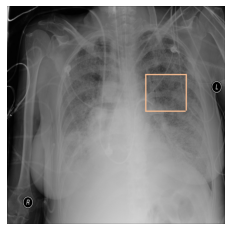

In [45]:
draw(parsed_train_df['31764d54-ea3b-434f-bae2-8c579ed13799'])

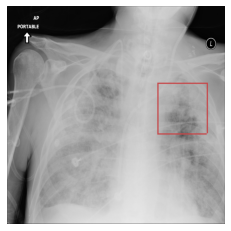

In [46]:
draw(parsed_train_df['32408669-c137-4e8d-bd62-fe8345b40e73'])

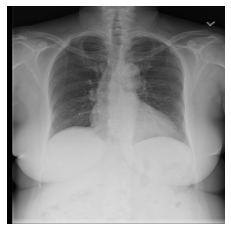

In [47]:
draw(parsed_train_df['cc2448c1-4102-4d04-90eb-4bf2385f3328'])

In [0]:
import pydicom as dcm
from matplotlib.patches import Rectangle
def show_dicom_images_with_boxes(data):
    img_data = list(data.T.to_dict().values())
    f, ax = plt.subplots(3,3, figsize=(16,18))
    for i,data_row in enumerate(img_data):
        patientImage = data_row['patientId']+'.dcm'
        imagePath = os.path.join("stage_2_train_images/",patientImage)
        #print(imagePath)
        data_row_img_data = dcm.read_file(imagePath)
        modality = data_row_img_data.Modality
        age = data_row_img_data.PatientAge
        sex = data_row_img_data.PatientSex
        data_row_img = dcm.dcmread(imagePath)
        ax[i//3, i%3].imshow(data_row_img.pixel_array, cmap=plt.cm.bone) 
        ax[i//3, i%3].axis('off')
        ax[i//3, i%3].set_title('ID: {}\nModality: {} Age: {} Sex: {} Target: {}\nClass: {}'.format(
                data_row['patientId'],modality, age, sex, data_row['Target'], data_row['class']))
        rows = df_merge[df_merge['patientId']==data_row['patientId']]
        box_data = list(rows.T.to_dict().values())
        for j, row in enumerate(box_data):
            ax[i//3, i%3].add_patch(Rectangle(xy=(row['x'], row['y']),
                        width=row['width'],height=row['height'], 
                        color="yellow",alpha = 0.1))   
    plt.show()

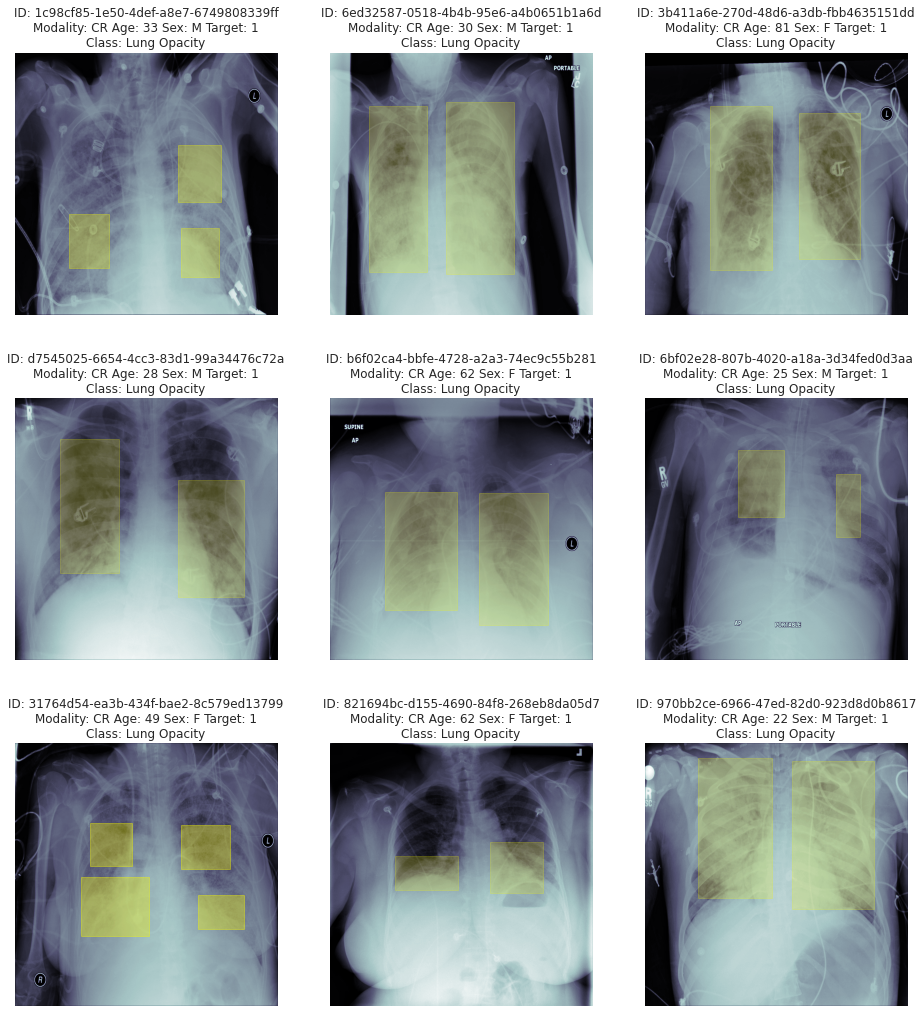

In [49]:
show_dicom_images_with_boxes(df_merge[df_merge['Target']==1].sample(9))

In [50]:
train_images_path = os.path.join('stage_2_train_images/')
test_images_path = os.path.join('stage_2_test_images/')
train_labels_path = os.path.join('stage_2_train_labels.csv')
print(os.path.dirname(train_labels_path))
print(os.path.dirname(train_images_path))
print(os.path.dirname(test_images_path))


stage_2_train_images
stage_2_test_images


In [51]:
from os import listdir
from os.path import isfile, join
onlyfiles = [f for f in listdir("./") if isfile(join("./", f))]
print(onlyfiles)

['GCP Credits Request Link - RSNA.txt', 'stage_2_detailed_class_info.csv', 'stage_2_sample_submission.csv', 'stage_2_train_labels (1).csv', 'rsna-pneumonia-detection-challenge.zip', 'stage_2_train_labels.csv', 'submission (1).gsheet', 'submission.gsheet', 'submission_iteration2.csv', 'submission1.csv']


In [0]:
# empty dictionary
import os
import csv
pneumonia_locations = {}
# load table
with open(train_labels_path, mode='r',encoding=None, errors=None, newline=None, closefd=True, opener=None) as infile:
    # open reader
    reader = csv.reader(infile)
    # skip header
    next(reader, None)
    # loop through rows
    for rows in reader:
        # retrieve information
        filename = rows[0]
        location = rows[1:5]
        pneumonia = rows[5]
        # if row contains pneumonia add label to dictionary
        # which contains a list of pneumonia locations per filename
        if pneumonia == '1':
            # convert string to float to int
            location = [int(float(i)) for i in location]
            # save pneumonia location in dictionary
            if filename in pneumonia_locations:
                pneumonia_locations[filename].append(location)
            else:
                pneumonia_locations[filename] = [location]

In [53]:
import random
folder = 'stage_2_train_images'
filenames = os.listdir(folder)
random.shuffle(filenames)
# split into train and validation filenames
n_train_samples = 1000
n_valid_samples = 1000

train_filenames = filenames[:n_train_samples]
valid_filenames = filenames[:n_valid_samples]
#train_filenames = filenames[n_valid_samples:]
#valid_filenames = filenames[:n_valid_samples]

print('n train samples', len(train_filenames))
print('n valid samples', len(valid_filenames))
#n_train_samples = len(filenames) - n_valid_samples


n train samples 1000
n valid samples 1000


In [0]:
from tensorflow.keras.utils import Sequence

class generator(tensorflow.keras.utils.Sequence):
    
    def __init__(self, folder, filenames, pneumonia_locations=None, batch_size=32, image_size=256, shuffle=True, augment=False, predict=False):
        self.folder = folder
        self.filenames = filenames
        self.pneumonia_locations = pneumonia_locations
        self.batch_size = batch_size
        self.image_size = image_size
        self.shuffle = shuffle
        self.augment = augment
        self.predict = predict
        self.on_epoch_end()
        
    def __load__(self, filename):
        # load dicom file as numpy array
        img = pydicom.dcmread(os.path.join(self.folder, filename)).pixel_array
        # create empty mask
        msk = np.zeros(img.shape)
        # get filename without extension
        filename = filename.split('.')[0]
        # if image contains pneumonia
        if filename in pneumonia_locations:
            # loop through pneumonia
            for location in pneumonia_locations[filename]:
                # add 1's at the location of the pneumonia
                x, y, w, h = location
                msk[y:y+h, x:x+w] = 1
        # if augment then horizontal flip half the time
        if self.augment and random.random() > 0.5:
            img = np.fliplr(img)
            msk = np.fliplr(msk)
        # resize both image and mask
        img = resize(img, (self.image_size, self.image_size), mode='reflect')
        msk = resize(msk, (self.image_size, self.image_size), mode='reflect') > 0.5
        #print("image shape",img.shape)
        #print("msk shape",msk.shape)
        # add trailing channel dimension
        img = np.expand_dims(img, -1)
        msk = np.expand_dims(msk, -1)
        return img, msk
    
    def __loadpredict__(self, filename):
        # load dicom file as numpy array
        img = pydicom.dcmread(os.path.join(self.folder, filename)).pixel_array
        # resize image
        img = resize(img, (self.image_size, self.image_size), mode='reflect')
        # add trailing channel dimension
        img = np.expand_dims(img, -1)
        return img
        
    def __getitem__(self, index):
        # select batch
        filenames = self.filenames[index*self.batch_size:(index+1)*self.batch_size]
        # predict mode: return images and filenames
        if self.predict:
            # load files
            imgs = [self.__loadpredict__(filename) for filename in filenames]
            # create numpy batch
            imgs = np.array(imgs)
            return imgs, filenames
        # train mode: return images and masks
        else:
            # load files
            items = [self.__load__(filename) for filename in filenames]
            # unzip images and masks
            imgs, msks = zip(*items)
            # create numpy batch
            imgs = np.array(imgs)
            msks = np.array(msks)
            return imgs, msks
        
    def on_epoch_end(self):
        if self.shuffle:
            random.shuffle(self.filenames)
        
    def __len__(self):
        if self.predict:
            # return everything
            return int(np.ceil(len(self.filenames) / self.batch_size))
        else:
            # return full batches only
            return int(len(self.filenames) / self.batch_size)

In [0]:
def create_downsample(channels, inputs):
    x = tf.keras.layers.BatchNormalization(momentum=0.9)(inputs)
    x = tf.keras.layers.LeakyReLU(0)(x)
    x = tf.keras.layers.Conv2D(channels, 1, padding='same', use_bias=False)(x)
    x = tf.keras.layers.MaxPool2D(2)(x)
    return x

def create_resblock(channels, inputs):
    x = tf.keras.layers.BatchNormalization(momentum=0.9)(inputs)
    x = tf.keras.layers.LeakyReLU(0)(x)
    x = tf.keras.layers.Conv2D(channels, 3, padding='same', use_bias=False)(x)
    x = tf.keras.layers.BatchNormalization(momentum=0.9)(x)
    x = tf.keras.layers.LeakyReLU(0)(x)
    x = tf.keras.layers.Conv2D(channels, 3, padding='same', use_bias=False)(x)
    return tf.keras.layers.add([x, inputs])

def create_network(input_size, channels=0, n_blocks=4, depth=4):
#def create_network(input_size):
    # input
    inputs = tf.keras.Input(shape=(input_size, input_size, 1))
    x = tf.keras.layers.Conv2D(channels, 3, padding='same', use_bias=False)(inputs)
    # residual blocks
    for d in range(depth):
        channels = channels * 2
        x = create_downsample(channels, x)
        for b in range(n_blocks):
            x = create_resblock(channels, x)
    # output
    x = tf.keras.layers.BatchNormalization(momentum=0.9)(x)
    x = tf.keras.layers.LeakyReLU(0)(x)
    x = tf.keras.layers.Conv2D(1, 1, activation='sigmoid')(x)
    outputs = tf.keras.layers.UpSampling2D(2**depth)(x)
    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    model.summary()
    return model

In [56]:
# define iou or jaccard loss function
def iou_loss(y_true, y_pred):
    y_true = tf.reshape(y_true, [-1])
    y_pred = tf.reshape(y_pred, [-1])
    intersection = tf.reduce_sum(y_true * y_pred)
    score = (intersection + 1.) / (tf.reduce_sum(y_true) + tf.reduce_sum(y_pred) - intersection + 1.)
    return 1 - score

# combine bce loss and iou loss
def iou_bce_loss(y_true, y_pred):
    return 0.5 * tf.keras.losses.binary_crossentropy(y_true, y_pred) + 0.5 * iou_loss(y_true, y_pred)

# mean iou as a metric
def mean_iou(y_true, y_pred):
    y_pred = tf.round(y_pred)
    intersect = tf.reduce_sum(y_true * y_pred, axis=[1, 2, 3])
    union = tf.reduce_sum(y_true, axis=[1, 2, 3]) + tf.reduce_sum(y_pred, axis=[1, 2, 3])
    smooth = tf.ones(tf.shape(intersect))
    return tf.reduce_mean((intersect + smooth) / (union - intersect + smooth))

# create network and compiler
model = create_network(input_size=256, channels=32, n_blocks=2, depth=4)
model.compile(optimizer='adam',
              loss=iou_bce_loss,
              metrics=['accuracy', mean_iou])

# cosine learning rate annealing
def cosine_annealing(x):
    lr = 0.001
    epochs = 20
    return lr*(np.cos(np.pi*x/epochs)+1.)/2
learning_rate = tf.keras.callbacks.LearningRateScheduler(cosine_annealing)



Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 1) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 256, 256, 32) 288         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 256, 256, 32) 128         conv2d[0][0]                     
__________________________________________________________________________________________________
leaky_re_lu (LeakyReLU)         (None, 256, 256, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [57]:

from skimage import measure
from skimage.transform import resize
from tensorflow.keras.utils import Sequence
# create train and validation generators
folder = 'stage_2_train_images'
train_gen = generator(folder, train_filenames, pneumonia_locations, batch_size=32, image_size=256, shuffle=True, augment=True, predict=False)
valid_gen = generator(folder, valid_filenames, pneumonia_locations, batch_size=32, image_size=256, shuffle=False, predict=False)

train_gen1 = np.asarray(train_gen)
valid_gen1 = np.asarray(valid_gen)


history = model.fit(train_gen, validation_data=valid_gen, callbacks=[learning_rate], epochs=20, shuffle=True)

Epoch 1/20
31/31 [==============================] - 1938s 63s/step - loss: 0.5991 - accuracy: 0.9365 - mean_iou: 0.5174 - val_loss: 0.5610 - val_accuracy: 0.9716 - val_mean_iou: 0.7521 - lr: 0.0010
Epoch 2/20
31/31 [==============================] - 1932s 62s/step - loss: 0.5183 - accuracy: 0.9624 - mean_iou: 0.6559 - val_loss: 0.6151 - val_accuracy: 0.9044 - val_mean_iou: 0.0564 - lr: 9.9384e-04
Epoch 3/20
31/31 [==============================] - 1934s 62s/step - loss: 0.5096 - accuracy: 0.9601 - mean_iou: 0.5950 - val_loss: 0.5223 - val_accuracy: 0.9661 - val_mean_iou: 0.6345 - lr: 9.7553e-04
Epoch 4/20
31/31 [==============================] - 2059s 66s/step - loss: 0.4952 - accuracy: 0.9591 - mean_iou: 0.6086 - val_loss: 0.4926 - val_accuracy: 0.9527 - val_mean_iou: 0.5184 - lr: 9.4550e-04
Epoch 5/20
31/31 [==============================] - 2000s 65s/step - loss: 0.4910 - accuracy: 0.9619 - mean_iou: 0.5925 - val_loss: 0.4819 - val_accuracy: 0.9677 - val_mean_iou: 0.6754 - lr: 9.045

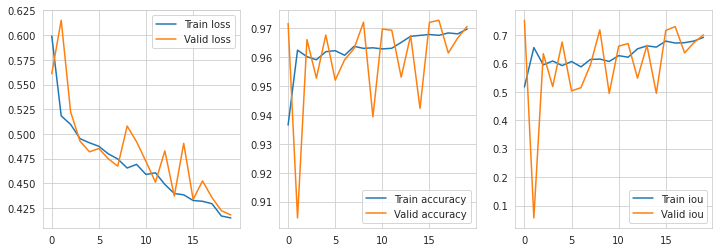

In [58]:
plt.figure(figsize=(12,4))
plt.subplot(131)
plt.plot(history.epoch, history.history["loss"], label="Train loss")
plt.plot(history.epoch, history.history["val_loss"], label="Valid loss")
plt.legend()
plt.subplot(132)
plt.plot(history.epoch, history.history["accuracy"], label="Train accuracy")
plt.plot(history.epoch, history.history["val_accuracy"], label="Valid accuracy")
plt.legend()
plt.subplot(133)
plt.plot(history.epoch, history.history["mean_iou"], label="Train iou")
plt.plot(history.epoch, history.history["val_mean_iou"], label="Valid iou")
plt.legend()
plt.show()

In [0]:
folder = 'stage_2_test_images'
test_filenames = os.listdir(folder)
print('n test samples:', len(test_filenames))

# create test generator with predict flag set to True
test_gen = generator(folder, test_filenames, None, batch_size=25, image_size=256, shuffle=False, predict=True)

# create submission dictionary
submission_dict = {}
# loop through testset
for imgs, filenames in test_gen:
    # predict batch of images
    preds = model.predict(imgs)
    # loop through batch
    for pred, filename in zip(preds, filenames):
        # resize predicted mask
        pred = resize(pred, (1024, 1024), mode='reflect')
        # threshold predicted mask
        comp = pred[:, :, 0] > 0.5
        # apply connected components
        comp = measure.label(comp)
        # apply bounding boxes
        predictionString = ''
        for region in measure.regionprops(comp):
            # retrieve x, y, height and width
            y, x, y2, x2 = region.bbox
            height = y2 - y
            width = x2 - x
            # proxy for confidence score
            conf = np.mean(pred[y:y+height, x:x+width])
            # add to predictionString
            predictionString += str(conf) + ' ' + str(x) + ' ' + str(y) + ' ' + str(width) + ' ' + str(height) + ' '
        # add filename and predictionString to dictionary
        filename = filename.split('.')[0]
        submission_dict[filename] = predictionString
    # stop if we've got them all
    if len(submission_dict) >= len(test_filenames):
        break

# save dictionary as csv file
sub = pd.DataFrame.from_dict(submission_dict,orient='index')
sub.index.names = ['patientId']
sub.columns = ['PredictionString']
sub.to_csv('submission12_5branch.csv')

n test samples: 3000
